In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import io


In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin1')
df.head()


Saving IMDb Movies India.csv to IMDb Movies India.csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
print("Columns:", df.columns.tolist())


Columns: ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [4]:
df = df.dropna()
target_col = [col for col in df.columns if 'rating' in col.lower()]
if target_col:
    target = target_col[0]
else:
    target = df.columns[-1]

X = df.drop(target, axis=1)
y = df[target]


In [5]:
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
num_cols = [col for col in X.columns if X[col].dtype != 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [6]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR()
}


In [7]:
results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(name, "MAE:", mae, "MSE:", mse, "R2:", r2)


LinearRegression MAE: 0.9222153461528058 MSE: 1.3766130810052901 R2: 0.2565854977380765
DecisionTree MAE: 1.1421378091872791 MSE: 2.223047703180212 R2: -0.2005159071693281
RandomForest MAE: 0.965767667844523 MSE: 1.558297569787986 R2: 0.1584701408082516
GradientBoosting MAE: 1.0384677184065834 MSE: 1.6357659435556864 R2: 0.1166347744876739
SVR MAE: 0.9365502376402327 MSE: 1.4284833409014548 R2: 0.22857392064718896


In [8]:
best_model_name = max(results, key=results.get)
best_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', models[best_model_name])])
best_model.fit(X_train, y_train)
print("Best Model:", best_model_name, "with R2 Score:", results[best_model_name])


Best Model: LinearRegression with R2 Score: 0.2565854977380765


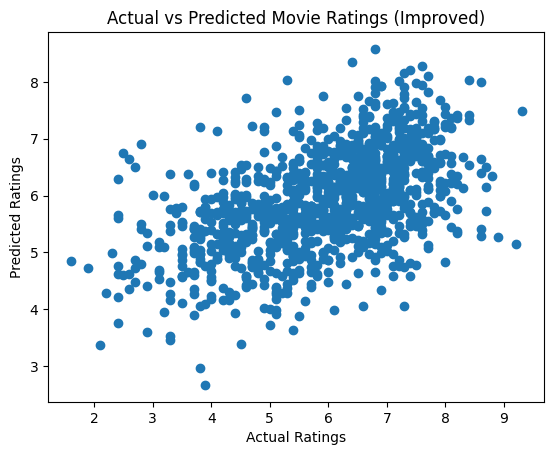

In [9]:
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings (Improved)")
plt.show()


In [10]:
sample = X_test.iloc[:5]
print("Sample Predictions:", best_model.predict(sample))
print("Actual:", y_test.iloc[:5].values)


Sample Predictions: [6.00052742 5.60411691 5.03630831 5.71794693 5.90583004]
Actual: [6.  2.4 3.8 3.8 7.2]
